# This is version to aspect term extraction and aspect category detection using SATLabel framework
https://www.researchgate.net/publication/359792164_SATLabel_A_Framework_for_Sentiment_and_Aspect_Terms_Based_Automatic_Topic_Labeling

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from collections import Counter
import numpy as np
from nltk import pos_tag
import pandas as pd

In [2]:
# read preprocess dataset
df = pd.read_csv('dataset/movies_20k.csv')

In [3]:
df.head()

,index,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,5,A terrible movie as everyone has said. What ma...,0


In [4]:
# Make sure to download the necessary NLTK data files
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

# Preprocess tweets
def preprocess(tweet):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(tweet.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

def aspect_sentiment(text):
    # Tokenisasi teks menjadi kata-kata individual
    tokens = word_tokenize(text)
    # Ambil daftar stop words dalam bahasa Inggris dari NLTK
    stop_words = set(stopwords.words('english'))
    # Hapus tanda baca dan ubah menjadi huruf kecil
    tokens = [word.lower() for word in tokens if word.isalnum()]
    # Tag POS pada token
    pos_tags = pos_tag(tokens)
    # Buat daftar istilah sentimen dan aspek
    sentiment_terms = []
    aspect_terms = []
    # Iterasi melalui token
    for word, tag in pos_tags:
        # Cek apakah kata tersebut merupakan stop word
        if word in stop_words:
            continue
        # Cek apakah kata tersebut merupakan adjektiva atau verba (istilah sentimen)
        if tag.startswith('JJ') or tag.startswith('VB'):
            sentiment_terms.append(word)
        # Cek apakah kata tersebut merupakan nomina (istilah aspek)
        elif tag.startswith('NN'):
            aspect_terms.append(word)
    # Menghapus duplikat dari istilah sentimen dan aspek
    sentiment_terms = list(set(sentiment_terms))
    aspect_terms = list(set(aspect_terms))
    return sentiment_terms, aspect_terms

In [5]:
# tweets = df['text'].tolist()

In [6]:
# # Extract sentiment and aspect terms for each tweet
# data = []
# for tweet in tweets:
#     sentiment_terms, aspect_terms = aspect_sentiment(tweet)
#     data.append({
#         "Sample Tweet": tweet,
#         "Sentiment Terms": ", ".join(sentiment_terms),
#         "Aspect Terms": ", ".join(aspect_terms)
#     })

# # Create a DataFrame to display the results
# df_AS = pd.DataFrame(data)
# df_AS


In [7]:
# df_AS.to_csv('dataset/movies_24k_as.csv')

In [8]:
# Buat kamus dan matriks dokumen-term
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from collections import Counter

In [9]:
preprocess_df = pd.read_csv('dataset/preprocess_movies_20k.csv')
reviews = preprocess_df['text'].apply(word_tokenize)
tweets = preprocess_df['text'].tolist()

In [10]:
# corpus = [" ".join(preprocess(text)) for text in reviews]

dictionary = corpora.Dictionary(reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews]

In [11]:
# Lakukan LDA
lda_model = models.LdaMulticore(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=10)

In [12]:
topics

[(0,
  '0.020*"movie" + 0.019*"film" + 0.009*"one" + 0.006*"like" + 0.006*"character" + 0.005*"story" + 0.005*"good" + 0.005*"make" + 0.005*"scene" + 0.004*"time"'),
 (1,
  '0.010*"show" + 0.008*"one" + 0.006*"like" + 0.006*"film" + 0.005*"get" + 0.005*"movie" + 0.004*"episode" + 0.004*"time" + 0.004*"even" + 0.004*"character"'),
 (2,
  '0.008*"film" + 0.007*"one" + 0.003*"story" + 0.003*"get" + 0.003*"time" + 0.003*"movie" + 0.003*"also" + 0.003*"two" + 0.003*"man" + 0.003*"like"'),
 (3,
  '0.027*"movie" + 0.016*"film" + 0.009*"one" + 0.008*"like" + 0.007*"time" + 0.007*"good" + 0.006*"bad" + 0.006*"see" + 0.006*"would" + 0.005*"really"'),
 (4,
  '0.015*"film" + 0.009*"movie" + 0.009*"one" + 0.007*"like" + 0.005*"character" + 0.004*"would" + 0.004*"scene" + 0.003*"even" + 0.003*"make" + 0.003*"story"')]

In [13]:
# Buat klaster per teks dari topik
sentiment_clusters = []
aspect_clusters = []
teks_cluster = []
for tweet in tweets:
    tokens = preprocess(tweet)
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)

    bow = dictionary.doc2bow(tokens)
    topic_distribution = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    teks_cluster.append((tweet, dominant_topic)) 
    # sentiment_clusters teks dan topic dominan dari teks tersebut
    sentiment_clusters.append((sentiment_terms, dominant_topic)) 
    # aspect_cluster teks dan topic dominan dari teks tersebut
    aspect_clusters.append((aspect_terms, dominant_topic))

In [14]:
aspect_terms

['tom',
 'school',
 'movie',
 'manner',
 'hope',
 'send',
 'tobr',
 'refuse',
 'zac',
 'watching',
 'hesitate',
 'instruction',
 'mine',
 'war',
 'emotion',
 'luggage',
 'fear',
 'thaw',
 'son',
 'performance',
 'letter',
 'village',
 'sadness',
 'care',
 'man',
 'mister',
 'choice',
 'responsibility',
 'london',
 'talent',
 'field',
 'robinson',
 'review',
 'lad',
 'life',
 'william',
 'use',
 'time',
 'accepts',
 'home',
 'nick',
 'story',
 'thomas',
 'air',
 'belt',
 'mention',
 'rest',
 'boy',
 'friend',
 'masterpiece',
 'lot',
 'goodnight',
 'cinema',
 'discovers',
 'cry',
 'compare',
 'sense',
 'orange',
 'happiness',
 'world',
 'stay',
 'others',
 'john',
 'host',
 'role',
 'mom',
 'childhood']

In [15]:
# Buat klaster berdasarkan topik dominan dari seluruh sentiment cluster masing-masing teks
# Untuk suatu topic, term yang menyusunnya apa saja
sentiment_clusters_by_topic = [[] for _ in range(5)]
aspect_clusters_by_topic = [[] for _ in range(5)]

for terms, topic in sentiment_clusters:
    sentiment_clusters_by_topic[topic].extend(terms)
for terms, topic in aspect_clusters:
    aspect_clusters_by_topic[topic].extend(terms)

In [16]:
teks_cluster_by_topic = [[] for _ in range(5)]
for teks, topic in teks_cluster:
    teks_cluster_by_topic[topic].append(teks)

In [17]:
# Tentukan istilah yang paling umum dalam klaster
def top_unigrams(cluster):
    counter = Counter(cluster)
    # return counter.most_common(1)[0][0] if counter else ""
    return [term for term, _ in counter.most_common(20)]

sentiment_unigrams = [top_unigrams(cluster) for cluster in sentiment_clusters_by_topic]
aspect_unigrams = [top_unigrams(cluster) for cluster in aspect_clusters_by_topic]

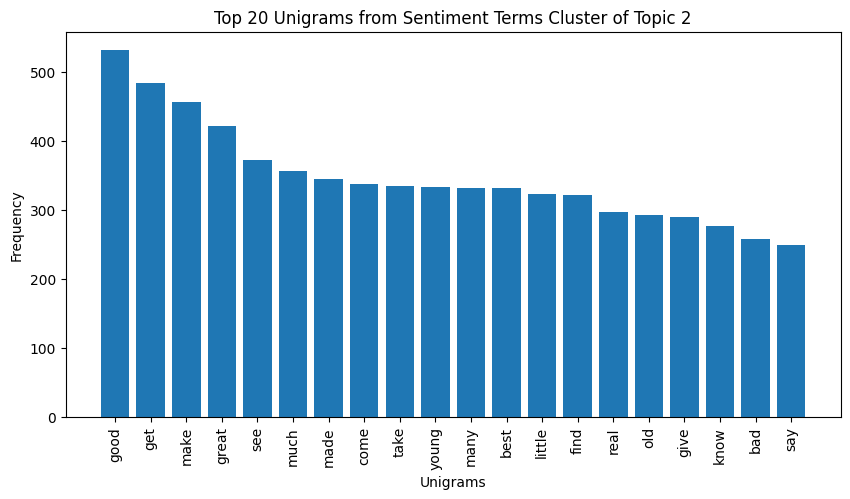

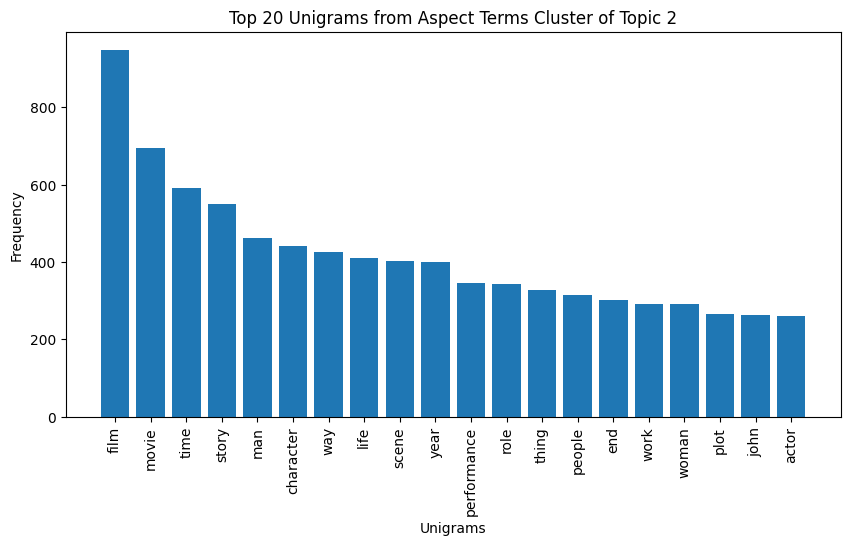

In [18]:
import matplotlib.pyplot as plt
# Menampilkan grafik Top 20 unigrams dari klaster istilah sentimen untuk topik nomor 12
topic_number = 2
if topic_number < len(sentiment_clusters_by_topic) and topic_number < len(aspect_clusters_by_topic):
    sentiment_counter = Counter(sentiment_clusters_by_topic[topic_number])
    aspect_counter = Counter(aspect_clusters_by_topic[topic_number])
    
    most_common_sentiment_unigrams = sentiment_counter.most_common(20)
    most_common_aspect_unigrams = aspect_counter.most_common(20)
    
    # Plot sentiment unigrams
    words_sentiment, counts_sentiment = zip(*most_common_sentiment_unigrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words_sentiment, counts_sentiment)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Unigrams from Sentiment Terms Cluster of Topic {topic_number}')
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot aspect unigrams
    words_aspect, counts_aspect = zip(*most_common_aspect_unigrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words_aspect, counts_aspect)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Unigrams from Aspect Terms Cluster of Topic {topic_number}')
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"Topic number {topic_number} is out of range.")

In [19]:
# Label topik
topic_labels = []
tfidf_vectorizer = TfidfVectorizer()
combined_terms = [" ".join(cluster) for cluster in sentiment_clusters_by_topic + aspect_clusters_by_topic]
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_terms)

In [20]:
from itertools import product
# Menghasilkan kombinasi dari kedua daftar unigram
combined_pairs = list(product(aspect_unigrams[0], sentiment_unigrams[0]))

# Mengambil 400 pasangan kombinasi pertama
top_400_pairs = combined_pairs[:400]

print(top_400_pairs)

[('movie', 'good'), ('movie', 'make'), ('movie', 'great'), ('movie', 'see'), ('movie', 'get'), ('movie', 'made'), ('movie', 'much'), ('movie', 'many'), ('movie', 'best'), ('movie', 'seen'), ('movie', 'know'), ('movie', 'acting'), ('movie', 'little'), ('movie', 'think'), ('movie', 'come'), ('movie', 'say'), ('movie', 'bad'), ('movie', 'give'), ('movie', 'take'), ('movie', 'real'), ('film', 'good'), ('film', 'make'), ('film', 'great'), ('film', 'see'), ('film', 'get'), ('film', 'made'), ('film', 'much'), ('film', 'many'), ('film', 'best'), ('film', 'seen'), ('film', 'know'), ('film', 'acting'), ('film', 'little'), ('film', 'think'), ('film', 'come'), ('film', 'say'), ('film', 'bad'), ('film', 'give'), ('film', 'take'), ('film', 'real'), ('character', 'good'), ('character', 'make'), ('character', 'great'), ('character', 'see'), ('character', 'get'), ('character', 'made'), ('character', 'much'), ('character', 'many'), ('character', 'best'), ('character', 'seen'), ('character', 'know'), ('c

In [21]:
transformed = [' '.join(pair) for pair in top_400_pairs]
print(transformed)

['movie good', 'movie make', 'movie great', 'movie see', 'movie get', 'movie made', 'movie much', 'movie many', 'movie best', 'movie seen', 'movie know', 'movie acting', 'movie little', 'movie think', 'movie come', 'movie say', 'movie bad', 'movie give', 'movie take', 'movie real', 'film good', 'film make', 'film great', 'film see', 'film get', 'film made', 'film much', 'film many', 'film best', 'film seen', 'film know', 'film acting', 'film little', 'film think', 'film come', 'film say', 'film bad', 'film give', 'film take', 'film real', 'character good', 'character make', 'character great', 'character see', 'character get', 'character made', 'character much', 'character many', 'character best', 'character seen', 'character know', 'character acting', 'character little', 'character think', 'character come', 'character say', 'character bad', 'character give', 'character take', 'character real', 'time good', 'time make', 'time great', 'time see', 'time get', 'time made', 'time much', 'ti

In [22]:
transformed_df = pd.DataFrame(transformed)
transformed_df.rename(columns={0: 'Pair'}, inplace=True)
transformed_df

,Pair
0,movie good
1,movie make
2,movie great
3,movie see
4,movie get
...,...
395,role say
396,role bad
397,role give
398,role take


In [23]:
import re
topics = lda_model.show_topics()
cleaned_topics = []

for topic_id, topic_string in topics:
    # Menghapus angka, tanda bintang, tanda plus, dan tanda kutip ganda dari setiap topik
    cleaned_topic_string = re.sub(r'[\d\*\+\"\'\.]', '', topic_string)
    # Menambahkan topik yang sudah dibersihkan ke dalam daftar
    cleaned_topics.append((topic_id, cleaned_topic_string))

# Menampilkan topik yang sudah dibersihkan
for topic_id, topic_string in cleaned_topics:
    print(topic_id, topic_string)

0 movie  film  one  like  character  story  good  make  scene  time
1 show  one  like  film  get  movie  episode  time  even  character
2 film  one  story  get  time  movie  also  two  man  like
3 movie  film  one  like  time  good  bad  see  would  really
4 film  movie  one  like  character  would  scene  even  make  story


In [24]:
topics_df = pd.DataFrame(cleaned_topics)
topics_df.rename(columns={0: 'Topics', 1: 'Keywords'}, inplace=True)
topics_df

,Topics,Keywords
0,0,movie film one like character story good...
1,1,show one like film get movie episode ti...
2,2,film one story get time movie also two ...
3,3,movie film one like time good bad see ...
4,4,film movie one like character would scen...


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity
def calculate_cosine_similarity(tfidf_matrix, topic_vector):
    return cosine_similarity(tfidf_matrix, topic_vector)

# Vectorize the terms using TfidfVectorizer
vectorizer = TfidfVectorizer()
topics_tfidf_matrix = vectorizer.fit_transform(topics_df['Keywords'])
pair_tfidf_matrix = vectorizer.transform(transformed_df['Pair'])

# Calculate cosine similarity for each review and topic
similarities = calculate_cosine_similarity(topics_tfidf_matrix, pair_tfidf_matrix)

In [26]:
len(similarities)

5

In [27]:
# Create a DataFrame to store the similarities
similarities_df = pd.DataFrame(similarities, columns=transformed_df['Pair'])

# Add review_id to the DataFrame for reference
# similarities_df['review_id'] = review['review_id']

# Display the resulting DataFrame
similarities_df

Pair,movie good,movie make,movie great,movie see,movie get,movie made,movie much,movie many,movie best,movie seen,...,role know,role acting,role little,role think,role come,role say,role bad,role give,role take,role real
0,0.464147,0.464147,0.236038,0.101535,0.120035,0.236038,0.236038,0.236038,0.236038,0.236038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.108632,0.108632,0.213613,0.091889,0.420051,0.213613,0.213613,0.213613,0.213613,0.213613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.105010,0.105010,0.206493,0.088826,0.406049,0.206493,0.206493,0.206493,0.206493,0.206493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.398545,0.103070,0.202677,0.471161,0.103070,0.202677,0.202677,0.202677,0.202677,0.202677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.425341,0.0,0.0,0.0
4,0.115406,0.446246,0.226935,0.097620,0.115406,0.226935,0.226935,0.226935,0.226935,0.226935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [28]:
# Find the index of the maximum similarity for each review
max_similarity_index = similarities.argmax(axis=1)

In [29]:
max_similarity_index

array([100,  44, 244,  63, 101], dtype=int64)

In [30]:
# get label or column name
label_pair = []
for i in max_similarity_index:
    label_pair.append(transformed[i])

label_pair

['scene good', 'character get', 'man get', 'time see', 'scene make']

In [83]:
# Concate max aspect similarity and review
df_single_aspect = pd.concat([topics_df['Keywords'], pd.DataFrame(label_pair)], axis=1)
df_single_aspect = df_single_aspect.rename(columns={0: 'Aspect'})
df_single_aspect

,Keywords,Aspect
0,movie film one like character story good...,scene good
1,show one like film get movie episode ti...,character get
2,film one story get time movie also two ...,man get
3,movie film one like time good bad see ...,time see
4,film movie one like character would scen...,scene make


### labeling using topic_distribution max

In [84]:
# Menentukan label untuk contoh tweet
sample_results = []
for tweet in tweets:
    tokens = preprocess(tweet)
    bow = dictionary.doc2bow(tokens)
    topic_distribution = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)
    label_terms = " ".join(sentiment_terms + aspect_terms)
    label_vector = tfidf_vectorizer.transform([label_terms]).toarray().flatten()
    
    similarity = []
    for i, (_, terms) in enumerate(topics):
        topic_terms = " ".join([term.split('*')[1].strip('"') for term in terms.split('+')])
        topic_vector = tfidf_vectorizer.transform([topic_terms]).toarray().flatten()
        similarity.append((i, 1 - cosine(label_vector, topic_vector)))
    best_match = max(similarity, key=lambda x: x[1])
    detected_label = best_match[0]
    
    sample_results.append((tweet, dominant_topic, detected_label))

In [85]:
draft_result = pd.DataFrame(sample_results).drop(columns=2)
# Ganti nama kolom
draft_result = draft_result.rename(columns={0: 'tweet', 1: 'topic_number'})
draft_result

,tweet,topic_number
0,grew 1965 watching loving thunderbird mate sch...,3
1,put movie dvd player sat coke chip expectation...,3
2,people know particular time past like feel nee...,3
3,even though great interest biblical movie bore...,3
4,terrible movie everyone said made laugh cameo ...,3
...,...,...
19995,ive read comment posted agree many intelligent...,4
19996,without doubt funniest curly stooge short ive ...,3
19997,first saw thief child make almost old jinni gu...,3
19998,fine poetic story beautiful scenery magnificen...,0


In [86]:
# Buat kamus yang memetakan nomor topik ke label topik
topic_no_to_label = {
    idx: row['Aspect'] for idx, row in df_single_aspect.iterrows()
}

# Ganti nomor topik dengan label topik di DataFrame teks
draft_result['topic label'] = draft_result['topic_number'].map(topic_no_to_label)

# Tampilkan DataFrame yang sudah diubah
draft_result

,tweet,topic_number,topic label
0,grew 1965 watching loving thunderbird mate sch...,3,time see
1,put movie dvd player sat coke chip expectation...,3,time see
2,people know particular time past like feel nee...,3,time see
3,even though great interest biblical movie bore...,3,time see
4,terrible movie everyone said made laugh cameo ...,3,time see
...,...,...,...
19995,ive read comment posted agree many intelligent...,4,scene make
19996,without doubt funniest curly stooge short ive ...,3,time see
19997,first saw thief child make almost old jinni gu...,3,time see
19998,fine poetic story beautiful scenery magnificen...,0,scene good


### labeling using cosine similarity

In [60]:
df_single_aspect

,Keywords,Aspect
0,movie film one like character story good...,scene good
1,show one like film get movie episode ti...,character get
2,film one story get time movie also two ...,man get
3,movie film one like time good bad see ...,time see
4,film movie one like character would scen...,scene make


In [64]:
preprocess_df['text'].head()

0    grew 1965 watching loving thunderbird mate sch...
1    put movie dvd player sat coke chip expectation...
2    people know particular time past like feel nee...
3    even though great interest biblical movie bore...
4    terrible movie everyone said made laugh cameo ...
Name: text, dtype: object

In [87]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity
def calculate_cosine_similarity(tfidf_matrix, topic_vector):
    return cosine_similarity(tfidf_matrix, topic_vector)

# Vectorize the terms using TfidfVectorizer
vectorizer = TfidfVectorizer()
tweet_tfidf_matrix = vectorizer.fit_transform(preprocess_df['text'])
topic_key_tfidf_matrix = vectorizer.transform(df_single_aspect['Keywords'])

# Calculate cosine similarity for each review and topic
similaritiy_tweet_keyword = calculate_cosine_similarity(tweet_tfidf_matrix, topic_key_tfidf_matrix)

In [88]:
# Create a DataFrame to store the similarities
similaritiy_tweet_keyword_df = pd.DataFrame(similaritiy_tweet_keyword)

similaritiy_tweet_keyword_df

,0,1,2,3,4
0,0.026606,0.033594,0.035985,0.051617,0.038882
1,0.151563,0.138913,0.107291,0.143953,0.118380
2,0.085009,0.079559,0.067029,0.084435,0.053395
3,0.127977,0.133829,0.145617,0.135661,0.104535
4,0.025853,0.022097,0.023669,0.070036,0.038798
...,...,...,...,...,...
19995,0.028853,0.032442,0.034751,0.045293,0.029540
19996,0.090903,0.078013,0.056850,0.061416,0.093473
19997,0.057887,0.020026,0.037942,0.073895,0.059973
19998,0.078918,0.062054,0.079463,0.076763,0.059688


In [89]:
# Find the index of the maximum similarity for each review
max_similarity_index_tk = similaritiy_tweet_keyword.argmax(axis=1)

# Concate max aspect similarity and review
df_cosine_topic = pd.concat([pd.DataFrame(preprocess_df['text']), pd.DataFrame(max_similarity_index_tk)], axis=1)
df_cosine_topic = df_cosine_topic.rename(columns={0: 'topic number'})
# df_single_aspect = df_single_aspect.dropna()
# df_single_aspect = df_single_aspect[df_single_aspect['content'].str.strip() != '']
# df_single_aspect.reset_index(drop=True, inplace=True)
df_cosine_topic

,text,topic number
0,grew 1965 watching loving thunderbird mate sch...,3
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,2
4,terrible movie everyone said made laugh cameo ...,3
...,...,...
19995,ive read comment posted agree many intelligent...,3
19996,without doubt funniest curly stooge short ive ...,4
19997,first saw thief child make almost old jinni gu...,3
19998,fine poetic story beautiful scenery magnificen...,2


In [90]:
# Mapping topic number to label

# Buat kamus yang memetakan nomor topik ke label topik
topic_no_to_label = {
    idx: row['Aspect'] for idx, row in df_single_aspect.iterrows()
}

# Ganti nomor topik dengan label topik di DataFrame teks
df_cosine_topic['topic label'] = df_cosine_topic['topic number'].map(topic_no_to_label)

# Tampilkan DataFrame yang sudah diubah
df_cosine_topic

,text,topic number,topic label
0,grew 1965 watching loving thunderbird mate sch...,3,time see
1,put movie dvd player sat coke chip expectation...,0,scene good
2,people know particular time past like feel nee...,0,scene good
3,even though great interest biblical movie bore...,2,man get
4,terrible movie everyone said made laugh cameo ...,3,time see
...,...,...,...
19995,ive read comment posted agree many intelligent...,3,time see
19996,without doubt funniest curly stooge short ive ...,4,scene make
19997,first saw thief child make almost old jinni gu...,3,time see
19998,fine poetic story beautiful scenery magnificen...,2,man get


### How about machine learning?

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer


def classification(teks, label):
    # Inisialisasi TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=1000)

    tfidf_text = teks

    # Memproses teks dan membangun TF-IDF
    tfidf_X = vectorizer.fit_transform(tfidf_text)

    # Membuat DataFrame dari hasil TF-IDF
    df_tfidf = pd.DataFrame(tfidf_X.toarray(), columns=vectorizer.get_feature_names_out())

    X = df_tfidf
    y = label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    precision = precision_score(y_test, rfc_pred, average='weighted')
    recall = recall_score(y_test, rfc_pred, average='weighted')
    f1 = f1_score(y_test, rfc_pred, average='weighted')
    print("Precsion:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    # print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [98]:
classification(draft_result['tweet'], draft_result['topic label'])

Precsion: 0.5792919352798039
Recall: 0.547
F1 Score: 0.487811530274668
               precision    recall  f1-score   support

character get       0.65      0.27      0.38       433
      man get       0.71      0.06      0.12       317
   scene good       0.49      0.64      0.56      1322
   scene make       0.67      0.02      0.03       454
     time see       0.58      0.81      0.68      1474

     accuracy                           0.55      4000
    macro avg       0.62      0.36      0.35      4000
 weighted avg       0.58      0.55      0.49      4000



In [99]:
classification(df_cosine_topic['text'], df_cosine_topic['topic label'])

Precsion: 0.8038243482998023
Recall: 0.7965
F1 Score: 0.7937084318078433
               precision    recall  f1-score   support

character get       0.88      0.66      0.75       421
      man get       0.86      0.69      0.77       722
   scene good       0.81      0.86      0.83      1080
   scene make       0.78      0.69      0.73       652
     time see       0.75      0.92      0.82      1125

     accuracy                           0.80      4000
    macro avg       0.82      0.76      0.78      4000
 weighted avg       0.80      0.80      0.79      4000

